- linear
- eda
- selearn
- R2
- residuals

In [1]:
import pandas as pd
df = pd.read_csv(r"toluca.csv")
df.head(5)

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


In [2]:
df.workHours.max()

546

In [3]:
df.workHours.min()

113

In [4]:
df.describe()

,lotSize,workHours
count,25.000000,25.000000
mean,70.000000,312.280000
std,28.722813,113.137645
min,20.000000,113.000000
25%,50.000000,224.000000
50%,70.000000,342.000000
75%,90.000000,389.000000
max,120.000000,546.000000


<Axes: xlabel='lotSize', ylabel='Count'>

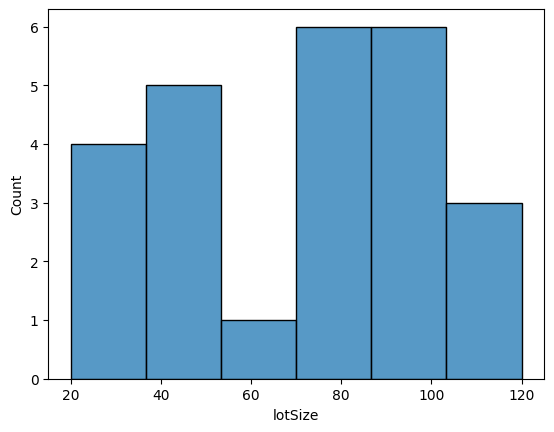

In [5]:
import seaborn as sns
sns.histplot(x=df["lotSize"])

<Axes: xlabel='workHours', ylabel='Count'>

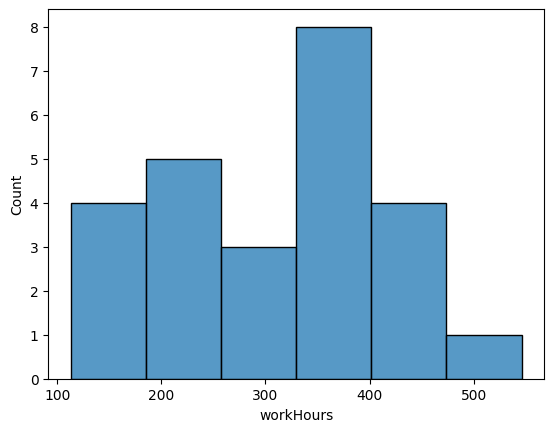

In [6]:
import seaborn as sns
sns.histplot(x=df["workHours"])

<Axes: xlabel='workHours', ylabel='lotSize'>

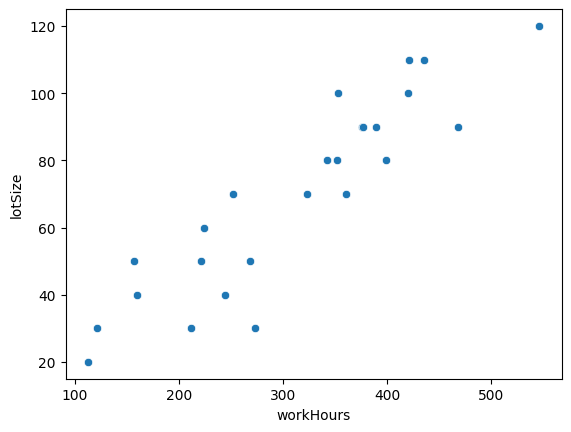

In [7]:
sns.scatterplot(x=df.workHours,y=df.lotSize)

In [8]:
df.corr(numeric_only=True)

,lotSize,workHours
lotSize,1.000000,0.906385
workHours,0.906385,1.000000


- linear regression

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df.iloc[:,1:],df.lotSize)

LinearRegression()

In [10]:
reg.coef_

array([0.2301084])

In [11]:
reg.intercept_

-1.8582511423063721

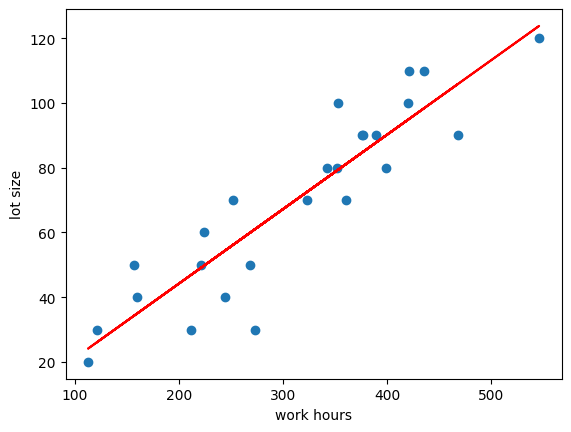

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df.workHours,df.lotSize)
plt.xlabel("work hours")
plt.ylabel("lot size")
plt.plot(df.workHours,reg.predict(df.iloc[:,1:]),color = "red")

In [13]:
reg.score(df.iloc[:, 1:], df.lotSize)

0.8215334744346305

In [14]:
from sklearn.metrics import r2_score
r2_score(df.lotSize, reg.predict(df.iloc[:,1:]))

0.8215334744346305

In [15]:
df["residuals"] = df.lotSize - reg.predict(df.iloc[:,1:])

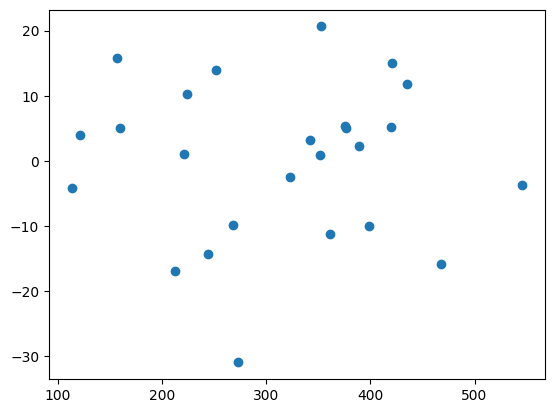

In [16]:
plt.scatter(df.workHours,df.residuals)

In [17]:
df.corr()

,lotSize,workHours,residuals
lotSize,1.000000,9.063848e-01,4.224530e-01
workHours,0.906385,1.000000e+00,6.821277e-16
residuals,0.422453,6.821277e-16,1.000000e+00
